In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from collections import Counter
from sklearn.model_selection import train_test_split

# Load music data

In [5]:
song_data = pd.read_csv("song_data.csv")


# Explore data

In [55]:
print(song_data.count())
song_data.head(5)


user_id         1116609
song_id         1116609
listen_count    1116609
title           1116609
artist          1116609
song            1116609
dtype: int64


,user_id,song_id,listen_count,title,artist,song
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Jack Johnson,The Cove - Jack Johnson
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Paco De Lucia,Entre Dos Aguas - Paco De Lucia
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Kanye West,Stronger - Kanye West
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,Jack Johnson,Constellations - Jack Johnson
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,Foo Fighters,Learn To Fly - Foo Fighters


In [70]:
song_data_grouped = song_data.groupby(['song']).agg({'listen_count': 'count'}).reset_index()
song_data_grouped.sort_values('listen_count',ascending = 0).head(5)

,song,listen_count
7122,Sehr kosmisch - Harmonia,5970
9077,Undo - Björk,5281
9873,You\'re The One - Dwight Yoakam,4806
2062,Dog Days Are Over (Radio Edit) - Florence + Th...,4536
6769,Revelry - Kings Of Leon,4339


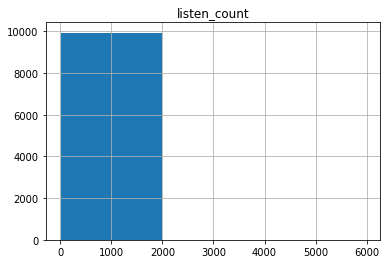

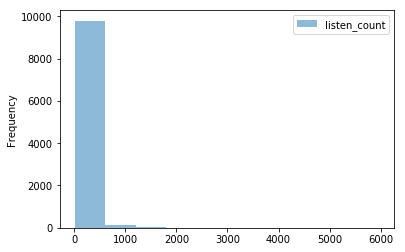

In [72]:
%matplotlib inline

song_data_grouped.hist(column='listen_count', bins=3)
song_data_grouped.plot.hist(alpha=0.5)

## Count number of users

In [81]:
users = song_data['user_id'].unique()
len(users)

66346

# Create a song recommender

In [74]:
train_data, test_data = train_test_split(song_data, test_size = 0.20, random_state=0)

### Simple popularity-based recommender

In [75]:
class Popularity_Recommender():

	# Initialize all the variables
	def __init__(self):
		# Tha training data which is been provided.
		self.train_data = None

		# The id of the user for which the recommendations is needed.
		self.user_id = None

		# The id of item e.g. Songs, Movies, Products etc.
		self.item_id = None

		# The final result which is going to be returned as a dataframe. 
		self.popularity_recommendataions = None

	# Create the recommendations.
	def create(self,train_data,user_id,item_id):

		# The training data
		self.train_data = train_data

		# The id of the user for which the recommendations is needed.
		self.user_id = user_id

		# The id of item e.g. Songs, Movies, Products etc.
		self.item_id = item_id


		# The items are grouped by item_id aggregated with the count of the users and the index is reseted.
		train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
		# The column named user_id is replaced by the name score.
		train_data_grouped.rename(columns = {'user_id': 'score'}, inplace = True)


		# The training data is sorted according to the score in descending order and by item_id in ascending order.
		train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
		# The new column named Rank is created by score sorted in ascending order.
		train_data_sort['Rank'] = train_data_sort['score'].rank(ascending = 0, method = 'first')


		# The first 15 items are saved into the popularity_recommendataions and it is returned. 
		self.popularity_recommendataions = train_data_sort.head(15)


	# Method to user created recommendations
	def recommend(self, user_id):

		# Init the user_recommendataion var by popularity_recommendataions since the recommendations has been saved into this column.
		user_recommendataion = self.popularity_recommendataions

		# Get the user_id
		user_recommendataion['user_id'] = user_id

		# Set the columns
		cols = user_recommendataion.columns.tolist()
		cols = cols[-1:] + cols[:-1]
		user_recommendataion = user_recommendataion[cols]

		return user_recommendataion

In [78]:
pr = Popularity_Recommender()
pr.create(train_data, 'user_id', 'song')

### Use popularity model to predict some recommendation

In [82]:
pr.recommend(users[0])

,user_id,song,score,Rank
7122,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Sehr kosmisch - Harmonia,4812,1.0
9077,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Undo - Björk,4211,2.0
9873,b80344d063b5ccb3212f76538f3d9e43d87dca9e,You\'re The One - Dwight Yoakam,3819,3.0
2062,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Dog Days Are Over (Radio Edit) - Florence + Th...,3624,4.0
6769,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Revelry - Kings Of Leon,3485,5.0
3608,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Horn Concerto No. 4 in E flat K495: II. Romanc...,3188,6.0
7110,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Secrets - OneRepublic,3103,7.0
8840,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Tive Sim - Cartola,2551,8.0
2712,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Fireflies - Charttraxx Karaoke,2525,9.0
3480,b80344d063b5ccb3212f76538f3d9e43d87dca9e,Hey_ Soul Sister - Train,2505,10.0


In [83]:
pr.recommend(users[1])

,user_id,song,score,Rank
7122,85c1f87fea955d09b4bec2e36aee110927aedf9a,Sehr kosmisch - Harmonia,4812,1.0
9077,85c1f87fea955d09b4bec2e36aee110927aedf9a,Undo - Björk,4211,2.0
9873,85c1f87fea955d09b4bec2e36aee110927aedf9a,You\'re The One - Dwight Yoakam,3819,3.0
2062,85c1f87fea955d09b4bec2e36aee110927aedf9a,Dog Days Are Over (Radio Edit) - Florence + Th...,3624,4.0
6769,85c1f87fea955d09b4bec2e36aee110927aedf9a,Revelry - Kings Of Leon,3485,5.0
3608,85c1f87fea955d09b4bec2e36aee110927aedf9a,Horn Concerto No. 4 in E flat K495: II. Romanc...,3188,6.0
7110,85c1f87fea955d09b4bec2e36aee110927aedf9a,Secrets - OneRepublic,3103,7.0
8840,85c1f87fea955d09b4bec2e36aee110927aedf9a,Tive Sim - Cartola,2551,8.0
2712,85c1f87fea955d09b4bec2e36aee110927aedf9a,Fireflies - Charttraxx Karaoke,2525,9.0
3480,85c1f87fea955d09b4bec2e36aee110927aedf9a,Hey_ Soul Sister - Train,2505,10.0


### Note: Every body (User_1 and User_2 both) got same recommendation, this is the problem with popularity remommendation model

# Build a song recommender with personalization

## Aplying personalization model to make song recommendations

### Accucary of the models

# Assignment

### Compute the number of unique users for each of these artists: 'Kanye West', 'Foo Fighters', 'Taylor Swift' and 'Lady GaGa'

In [86]:
song_data_kanye_west = song_data[song_data["artist"] == "Kanye West"]['user_id'].unique()
song_data_foo_fighters = song_data[song_data["artist"] == "Foo Fighters"]['user_id'].unique()
song_data_taylor_swift = song_data[song_data["artist"] == "Taylor Swift"]['user_id'].unique()
song_data_lady_gaGa = song_data[song_data["artist"] == "Lady GaGa"]['user_id'].unique()

print(len(song_data_kanye_west))
print(len(song_data_foo_fighters))
print(len(song_data_taylor_swift))
print(len(song_data_lady_gaGa))

2522
2055
3246
2928


In [87]:
artist_song_count_data = song_data.groupby(['artist']).agg({'listen_count': 'sum'}).reset_index()

In [91]:
artist_song_count_data.sort_values("listen_count", ascending=False).head(5)

,artist,listen_count
1649,Kings Of Leon,43218
913,Dwight Yoakam,40619
344,Björk,38889
648,Coldplay,35362
1106,Florence + The Machine,33387


In [92]:
artist_song_count_data.sort_values("listen_count", ascending=True).head(5)

,artist,listen_count
3301,William Tabbert,14
2410,Reel Feelings,24
308,Beyoncé feat. Bun B and Slim Thug,26
401,Boggle Karaoke,30
856,Diplo,30
